In [87]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.subplots as subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('Expanded_data_with_more_features.csv')

In [89]:
df.head(2)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [91]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


In [92]:
df.duplicated().sum()

np.int64(0)

In [93]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [94]:
df.drop('Unnamed: 0',axis=True,inplace=True)

In [95]:
df['LunchType'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [96]:
df.shape

(30641, 14)

# Filling Missing Values

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [98]:
df['EthnicGroup']=df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0])
df['ParentEduc']=df['ParentEduc'].fillna(df['ParentEduc'].mode()[0])

df['ParentMaritalStatus']=df['ParentMaritalStatus'].fillna(df['ParentMaritalStatus'].mode()[0])
df['PracticeSport']=df['PracticeSport'].fillna(df['PracticeSport'].mode()[0])
df['IsFirstChild']=df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0])
df['NrSiblings']=df['NrSiblings'].fillna(df['NrSiblings'].median())
df['TransportMeans']=df['TransportMeans'].fillna(df['TransportMeans'].mode()[0])
df['WklyStudyHours']=df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0])
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


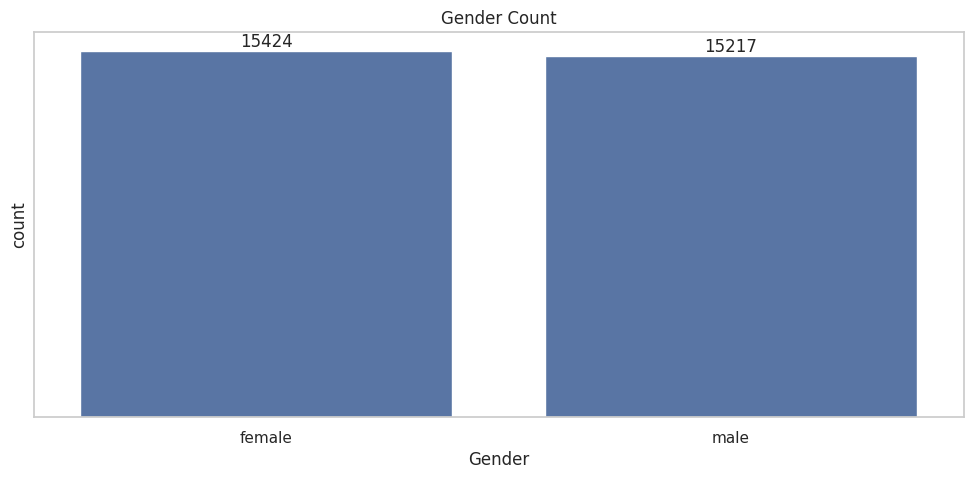

In [99]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.yticks([])
plt.title("Gender Count")
plt.show()

# Distribution of mathscore readingscore and writing score

Text(0, 0.5, '')

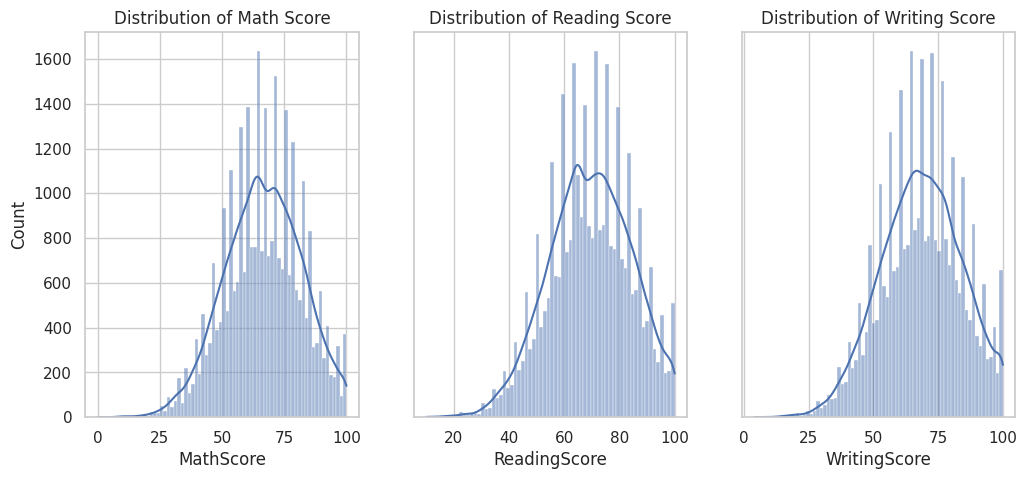

In [100]:
fig,axes=plt.subplots(1,3,figsize=(12,5))
sns.histplot(df['MathScore'],kde=True,ax=axes[0])
axes[0].set_title("Distribution of Math Score")

sns.histplot(df['ReadingScore'],kde=True,ax=axes[1])
axes[1].set_title("Distribution of Reading Score")
axes[1].set_yticks([])
axes[1].set_ylabel("")

sns.histplot(df['WritingScore'],kde=True,ax=axes[2])
axes[2].set_title("Distribution of Writing Score")
axes[2].set_yticks([])
axes[2].set_ylabel("")

In [101]:
gender_influence_scores=df.groupby('Gender').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

fig=px.bar(gender_influence_scores,barmode='group',title='Gender Influence on Scores')

fig.show()

from the above chart we can conclude that gender has some influence on the scores.females tend to score higher than males in reading and writing score while males average math score is higher than females

In [104]:
avg_scores_by_ethnic_grps=df.groupby('EthnicGroup').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

fig=px.bar(avg_scores_by_ethnic_grps,barmode='group',title='Average Scores by Ethnic Group')

fig.show()

from the above chart Students in group E perform the best on average in all three subjects

<Axes: ylabel='ParentEduc'>

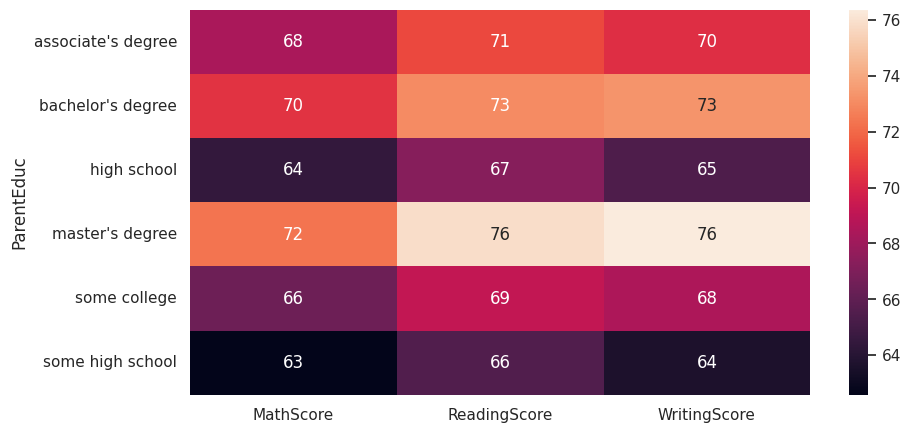

In [127]:
effect_of_parentedu=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

plt.figure(figsize=(10,5))
sns.heatmap(effect_of_parentedu,annot=True)



Students whose parents have higher levels of education tend to have higher average scores in Math, Reading, and Writing compared to students whose parents have lower education levels.

In [146]:


siblings_1stchild_affect=df.groupby(['IsFirstChild','NrSiblings']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).reset_index()

px.bar(
    siblings_1stchild_affect,
    x='NrSiblings',
    y='MathScore',
    color='IsFirstChild',
    barmode='group',
    title='Average Math Score by First Child Status & Number of Siblings'
)


In [151]:
px.bar(siblings_1stchild_affect,x='NrSiblings',y='ReadingScore',color='IsFirstChild',barmode='group', title='Average Reading Score by First Child Status & Number of Siblings')

In [154]:
px.bar(siblings_1stchild_affect,x='NrSiblings',y='WritingScore',color='IsFirstChild',barmode='group',title='Average Writing Score by First Child Status & Number of Siblings')

First-born students generally have slightly higher average scores, while the number of siblings has minimal effect.

In [156]:
df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).reset_index()

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


<Axes: ylabel='ParentMaritalStatus'>

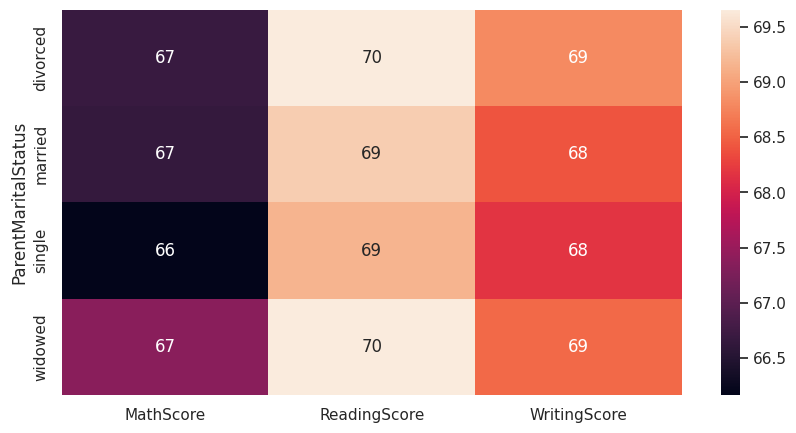

In [164]:
parents_marital_sts=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
plt.figure(figsize=(10,5))
sns.heatmap(parents_marital_sts,annot=True)

here we can conclude that parents marital status doesnot affect students performance.there isnt much difference in the students average scores

In [169]:
gb1=df.groupby('LunchType').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).reset_index()

fig=px.bar(
    gb1,
    x='LunchType',
    y=['MathScore','ReadingScore','WritingScore'],
    barmode='group',
    title='Average Scores by Lunch Type'
)

fig.show()

Students receiving a standard lunch generally achieve higher average scores across Math, Reading, and Writing compared to those on free/reduced lunch.

<Axes: ylabel='TransportMeans'>

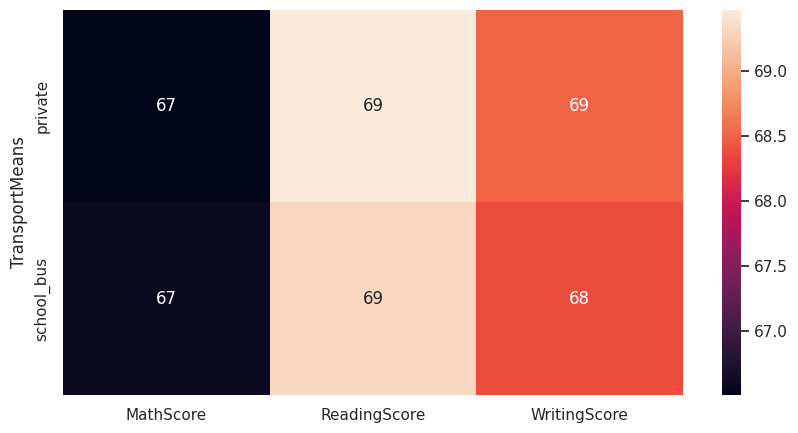

In [171]:
gb2=df.groupby('TransportMeans').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})

plt.figure(figsize=(10,5))
sns.heatmap(gb2,annot=True)

Transportation doest affect the students performance

In [176]:
gb2=df.groupby('PracticeSport').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).reset_index()

fig=px.bar(
    gb2,
    x='PracticeSport',
    y=['MathScore','ReadingScore','WritingScore'],
    barmode='group',
    title='Average Scores by Practice Sport'
)
fig.show()

Regular sports practice is associated with a slight positive impact on students’ academic scores.

In [180]:
gb2=df.groupby('WklyStudyHours').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).reset_index()

fig=px.scatter(
    gb2,
    x='WklyStudyHours',
    y=['MathScore','ReadingScore','WritingScore'],

    title='Average Scores by Weekly Study Hours'
)
fig.show()

students whose weekly study hours are greater that 10 has higher average scores than others

In [181]:
gb3=df.groupby('TestPrep').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'}).reset_index()

fig=px.bar(
    gb3,
    x='TestPrep',
    y=['MathScore','ReadingScore','WritingScore'],
    barmode='group',
    title='Average Scores by Test Preparation'
)
fig.show()

students who prepared the test have higher average scores than students who dont

# Overall Conclusion:

From the analysis of the dataset, we can conclude the following:

Gender Influence: Females tend to score higher in Reading and Writing, while males have a slightly higher average in Math.

Ethnic Group: Students in group E perform the best on average across all subjects.

Parental Education: Higher parental education levels are associated with higher student scores in Math, Reading, and Writing.

Birth Order & Siblings: First-born students show slightly better performance, while the number of siblings has minimal impact.

Parental Marital Status: Has little to no effect on student performance.

Lunch Type: Students receiving a standard lunch achieve higher scores than those on free/reduced lunch.

Transportation Means: Does not significantly affect performance.

Sports Practice: Regular practice has a slight positive impact on scores.

Weekly Study Hours: Students studying more than 10 hours weekly perform better on average.

Test Preparation: Students who completed the test preparation course achieve higher scores than those who did not.

Final Insight: Academic performance is influenced by a combination of factors like gender, parental education, study habits, and preparation, while some factors like marital status and transportation have little effect.